In [1]:
from utils import *
from MySolution import MyClassifier, MyClustering, MyLabelSelection, MyFeatureSelection

%load_ext autoreload
%autoreload 2

Synthetic data shape:  (1000, 2) (1000,)


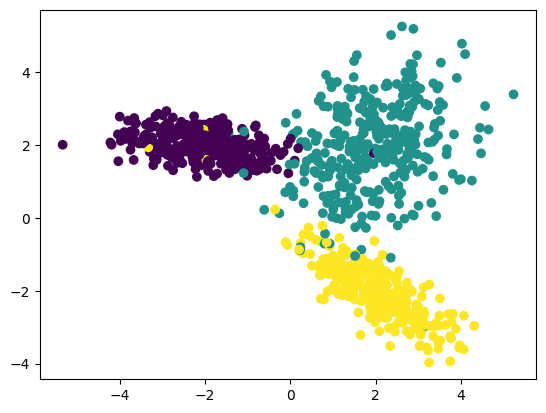

In [2]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])

MNIST data shape:  (1000, 784) (1000,)


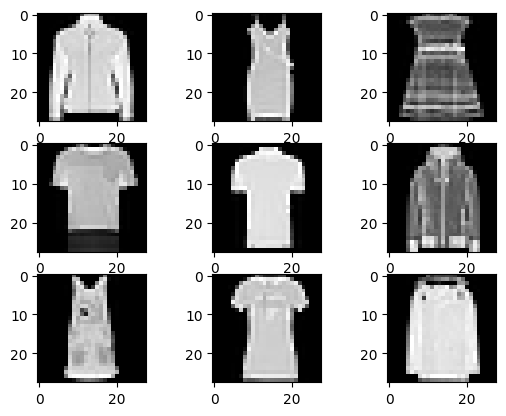

In [3]:
mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28,28), cmap='gray')
plt.show()

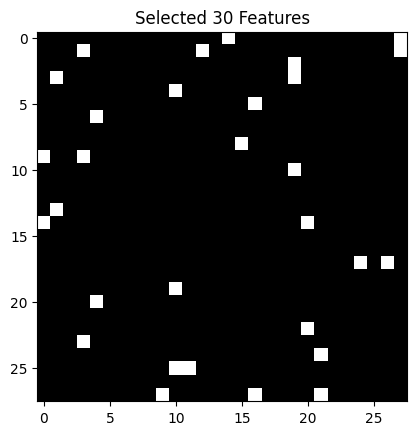

In [4]:
import numpy as np

data = prepare_mnist_data()

# randomly choose 30 features
np.random.seed(0)
selected_features = np.random.choice(data['trainX'].shape[1], 30, replace=False)
data['trainX'] = data['trainX'][:, selected_features]
data['testX'] = data['testX'][:, selected_features]

visualize_features(selected_features)

In [8]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)
from sklearn.cluster import SpectralClustering

K_synthetic = [3, 5, 10]
K_mnist = [3, 10, 32]

result2 = {}
nmi_list = []
accuracy_list = []
# Synthetic data experiments
for K in K_synthetic:
    data = prepare_synthetic_data()
    clustering_class = MyClustering(K)
    clustering_class.train_reduced(data['trainX'])
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    nmi = clustering_class.evaluate_clustering(data['trainY'])
    nmi_list.append(nmi)
    print(f"Clustering NMI for K={K}: {nmi}")
    accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    result2['synthetic'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}
    # print(result2)

nmi_list = []
accuracy_list = []
# MNIST data experiments
for K in K_mnist:
    data = prepare_mnist_data()
    clustering_class = MyClustering(K)
    clustering_class.train_reduced(data['trainX'])
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    nmi = clustering_class.evaluate_clustering(data['trainY'])
    nmi_list.append(nmi)
    print(f"Clustering NMI for K={K}: {nmi}")
    accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    result2['mnist'] = {'K': K_mnist, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

print(result2)


# Task 1
result1 = {'synthetic_test_accuracy':0.9, 'mnist_test_accuracy':0.85}


# Task 2
# result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
#             'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}

# Task 3
# only include the plots for the option of task 3 you chosen in the report                    
# result3_1 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
#             'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}

result3_2 = {'feature_number':[5, 20, 80, 320, 784], 'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6], 
                                                'clustering_accuracy(our algo)':[0.35,0.35,0.45,0.55,0.6], 'clustering_accuracy(random)':[0.3,0.3,0.4,0.5,0.6], 
                                                'nmi(our algo)':[0.35,0.4,0.45,0.5,0.5], 'nmi(random)':[0.3,0.35,0.4,0.5,0.5]}


# plot_result(result2=result2)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)

Number of components selected: 2
Explained variance covered: 1.00
Converged after 9 iterations.
Clustering NMI for K=3: 0.8278254854605318
Classification accuracy for K=3: 0.968
Number of components selected: 2
Explained variance covered: 1.00
Clustering NMI for K=5: 0.7063943280676578
Classification accuracy for K=5: 0.944
Number of components selected: 2
Explained variance covered: 1.00
Clustering NMI for K=10: 0.8829603323172518
Classification accuracy for K=10: 0.976
Number of components selected: 216
Explained variance covered: 0.98
Converged after 13 iterations.
Clustering NMI for K=3: 0.3006423547257323
Classification accuracy for K=3: 0.64
Number of components selected: 216
Explained variance covered: 0.98
Clustering NMI for K=10: 0.5236692734418322
Classification accuracy for K=10: 0.798
Number of components selected: 216
Explained variance covered: 0.98
Converged after 19 iterations.
Clustering NMI for K=32: 0.6542644061115335
Classification accuracy for K=32: 0.878
{'synthet